In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from pillow_heif import register_heif_opener
register_heif_opener()
from typing import List, Dict
from PIL import Image, ImageOps


# Configura o matplotlib para exibir plots maiores e mais legíveis
plt.rcParams['figure.figsize'] = [8, 8]

In [2]:
# MAX_WIDTH = 1280
# MAX_HEIGHT = 720
# image_folder = '../data/coffee_scene_nopuff/'
image_folder = '../data/coffee_rotate_scene_2/'
# image_folder = '../data/rio_niteroi_scene/'
# image_folder = '../data/teather_scene/'

images: List[np.ndarray] = []
image_names: List[str] = []

print(f'Searching images in: {os.path.abspath(image_folder)}')
for filename in sorted(os.listdir(image_folder)):
    # if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.heic')):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        p = os.path.join(image_folder, filename)
        img = None
        
        # Tenta carregar com OpenCV primeiro (para formatos suportados)
        if not filename.lower().endswith('.heic'):
            img = cv2.imread(p)
        
        # Se OpenCV falhou ou é um arquivo HEIC, tenta com Pillow
        if img is None:
            try:
                pil_img = Image.open(os.path.abspath(p))
                # Corrige orientação baseada em EXIF (importante para HEIC)
                pil_img = ImageOps.exif_transpose(pil_img)
                # Converte para RGB se necessário
                if pil_img.mode != 'RGB':
                    pil_img = pil_img.convert('RGB')
                # Converte PIL para OpenCV (BGR)
                img = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)
            except Exception as e:
                print(f'Falha ao carregar {filename} com Pillow: {e}')
                continue
        
        if img is not None:
            images.append(img)
            image_names.append(filename)
        else:
            print(f'Falha ao carregar: {filename}')

print(f'Total de imagens carregadas: {len(images)}')
assert len(images) >= 2, 'At least 2 images are required.'

Searching images in: /files/Doutorado/2025s2/MO446/T1/data/coffee_rotate_scene_2
Total de imagens carregadas: 8


In [3]:
# 1. Inicializa o detector ORB
# nfeatures define o número máximo de keypoints a serem detectados
orb = cv2.ORB_create(nfeatures=50000)

# Itera sobre cada imagem carregada
for i, img in enumerate(images):
    # Converte a imagem para escala de cinza
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # 2. Detecta os keypoints e calcula seus descritores
    keypoints, descriptors = orb.detectAndCompute(gray_img, None)
    
    # 3. Desenha os keypoints na imagem original (colorida)
    img_with_keypoints = cv2.drawKeypoints(
        img, 
        keypoints, 
        None, # output image
        color=(0, 255, 0), # Desenha os keypoints em verde
        flags=0
    )
    
    print(f"Imagem: '{image_names[i]}' - Keypoints detectados: {len(keypoints)}")
    
    # 4. Exibe a imagem usando matplotlib
    # Converte de BGR (padrão do OpenCV) para RGB (padrão do Matplotlib)
    # plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
    # plt.title(f"Keypoints ORB em '{image_names[i]}'")
    # plt.axis('off') # Remove os eixos x e y
    # plt.show()


Imagem: 'IMG_3205.jpg' - Keypoints detectados: 43236
Imagem: 'IMG_3206.jpg' - Keypoints detectados: 41629
Imagem: 'IMG_3207.jpg' - Keypoints detectados: 35475
Imagem: 'IMG_3208.jpg' - Keypoints detectados: 39427
Imagem: 'IMG_3209.jpg' - Keypoints detectados: 35924
Imagem: 'IMG_3210.jpg' - Keypoints detectados: 29372
Imagem: 'IMG_3211.jpg' - Keypoints detectados: 33843
Imagem: 'IMG_3212.jpg' - Keypoints detectados: 35300


In [4]:
# 1. Inicializa o detector SIFT
# nfeatures define o número máximo de keypoints a serem detectados
sift = cv2.SIFT_create(nfeatures=50000)

# Itera sobre cada imagem carregada
for i, img in enumerate(images):
    # Converte a imagem para escala de cinza
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # 2. Detecta os keypoints e calcula seus descritores
    keypoints, descriptors = sift.detectAndCompute(gray_img, None)
    
    # 3. Desenha os keypoints na imagem original (colorida)
    img_with_keypoints = cv2.drawKeypoints(
        img, 
        keypoints, 
        None, # output image
        color=(0, 255, 0), # Desenha os keypoints em verde
        flags=0
    )
    
    print(f"Imagem: '{image_names[i]}' - Keypoints detectados: {len(keypoints)}")
    
    # 4. Exibe a imagem usando matplotlib
    # Converte de BGR (padrão do OpenCV) para RGB (padrão do Matplotlib)
    # plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
    # plt.title(f"Keypoints SIFT em '{image_names[i]}'")
    # plt.axis('off') # Remove os eixos x e y
    # plt.show()


Imagem: 'IMG_3205.jpg' - Keypoints detectados: 33460
Imagem: 'IMG_3206.jpg' - Keypoints detectados: 28880
Imagem: 'IMG_3207.jpg' - Keypoints detectados: 20610
Imagem: 'IMG_3208.jpg' - Keypoints detectados: 27700
Imagem: 'IMG_3209.jpg' - Keypoints detectados: 24380
Imagem: 'IMG_3210.jpg' - Keypoints detectados: 18841
Imagem: 'IMG_3211.jpg' - Keypoints detectados: 25497
Imagem: 'IMG_3212.jpg' - Keypoints detectados: 29927


Imagem: 'IMG_3205.jpg' - ORB: 43236 | SIFT: 33460


Imagem: 'IMG_3206.jpg' - ORB: 41629 | SIFT: 28880
Imagem: 'IMG_3207.jpg' - ORB: 35475 | SIFT: 20610
Imagem: 'IMG_3208.jpg' - ORB: 39427 | SIFT: 27700
Imagem: 'IMG_3209.jpg' - ORB: 35924 | SIFT: 24380
Imagem: 'IMG_3210.jpg' - ORB: 29372 | SIFT: 18841
Imagem: 'IMG_3211.jpg' - ORB: 33843 | SIFT: 25497
Imagem: 'IMG_3212.jpg' - ORB: 35300 | SIFT: 29927


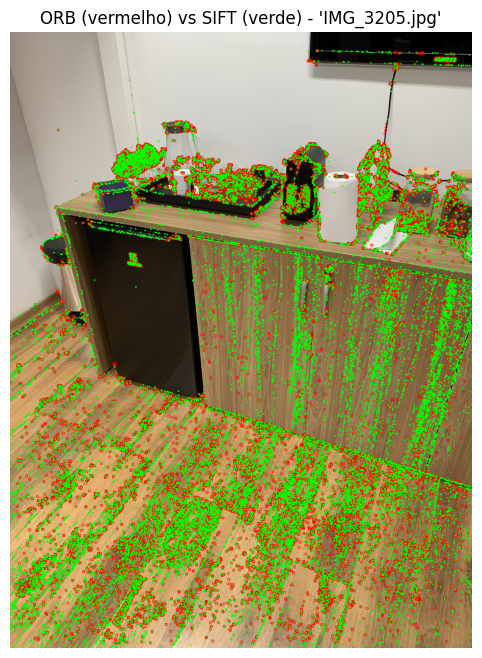

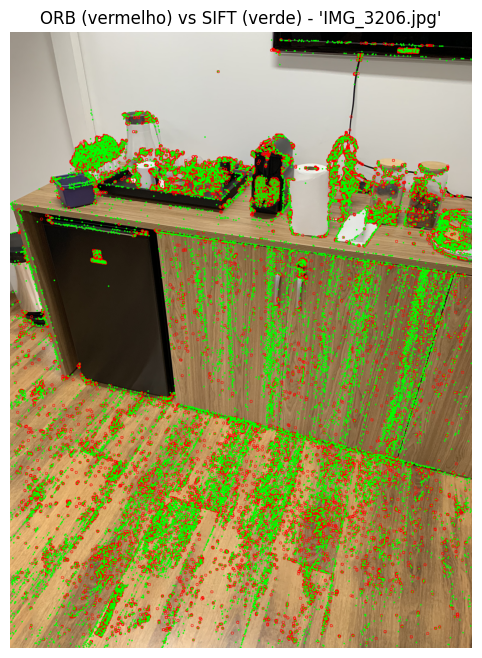

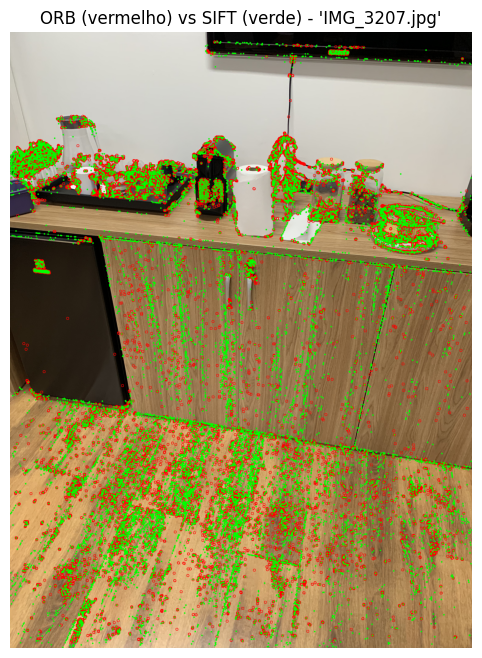

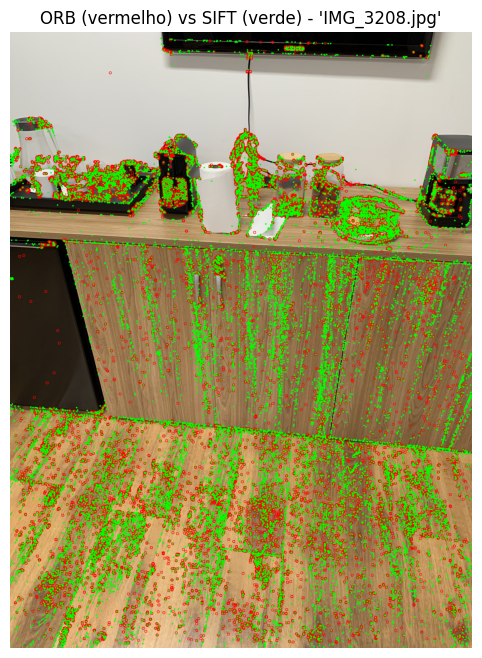

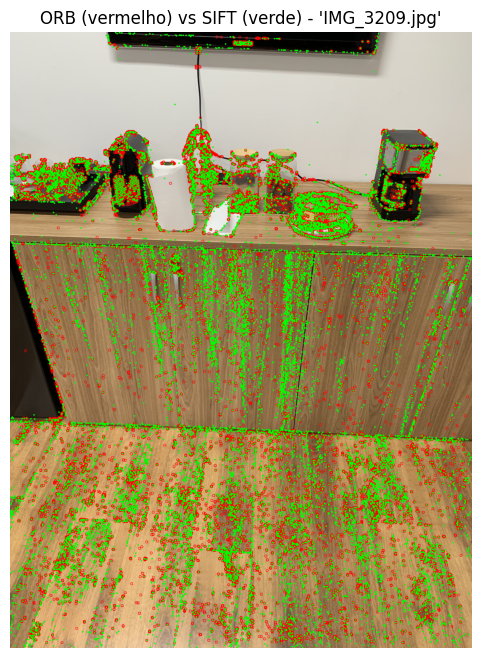

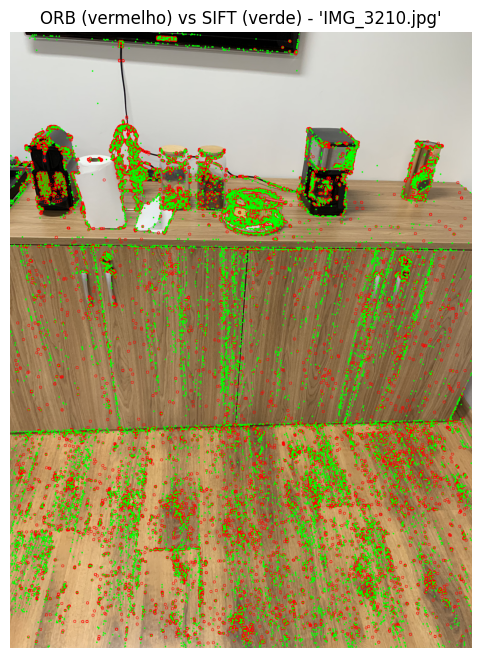

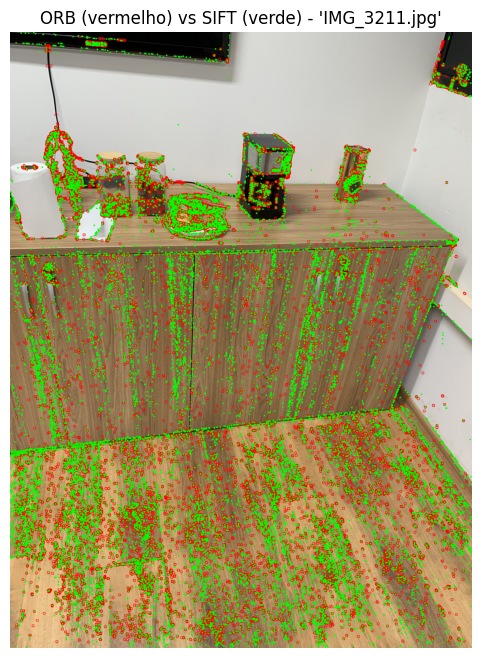

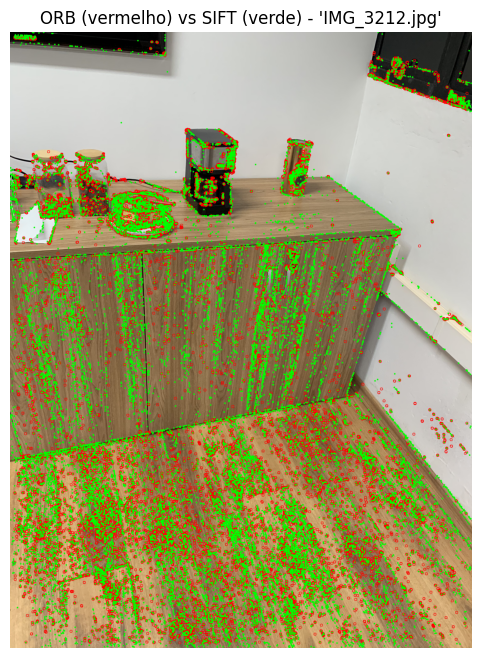

In [5]:
# Tornar marcadores maiores desenhando círculos manualmente e salvar comparações
orb_radius = 8    # raio dos keypoints ORB
sift_radius = 5   # raio dos keypoints SIFT

out_dir = os.path.join('..', 'report', 'figs', 'kp_comp', os.path.basename(os.path.normpath(image_folder)))
os.makedirs(out_dir, exist_ok=True)

for i, img in enumerate(images):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    orb_keypoints, _ = orb.detectAndCompute(gray_img, None)
    sift_keypoints, _ = sift.detectAndCompute(gray_img, None)

    vis = img.copy()

    # ORB em vermelho (círculo só contorno)
    for kp in orb_keypoints:
        x, y = map(int, kp.pt)
        cv2.circle(vis, (x, y), orb_radius, (0, 0, 255), 2)

    # SIFT em verde (círculo preenchido)
    for kp in sift_keypoints:
        x, y = map(int, kp.pt)
        cv2.circle(vis, (x, y), sift_radius, (0, 255, 0), -1)

    print(f"Imagem: '{image_names[i]}' - ORB: {len(orb_keypoints)} | SIFT: {len(sift_keypoints)}")

    plt.figure()
    plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
    plt.title(f"ORB (vermelho) vs SIFT (verde) - '{image_names[i]}'")
    plt.axis('off')
    save_path = os.path.join(out_dir, f"{os.path.splitext(image_names[i])[0]}_orb_vs_sift.png")
    plt.savefig(save_path, dpi=200, bbox_inches='tight')
    # plt.show()

### ORB Matching

In [6]:
orb = cv2.ORB_create(nfeatures=50000)
dataset = []
for i, img in enumerate(images):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    keypoints, descriptors = orb.detectAndCompute(gray_img, None)
    dataset.append({'image': img, 'gray': gray_img, 'kp': keypoints, 'desc': descriptors})


19019
Saved to /files/Doutorado/2025s2/MO446/T1/report/figs/kp_matching/coffee_rotate_scene_2/IMG_3205_IMG_3206_matches_orb.png


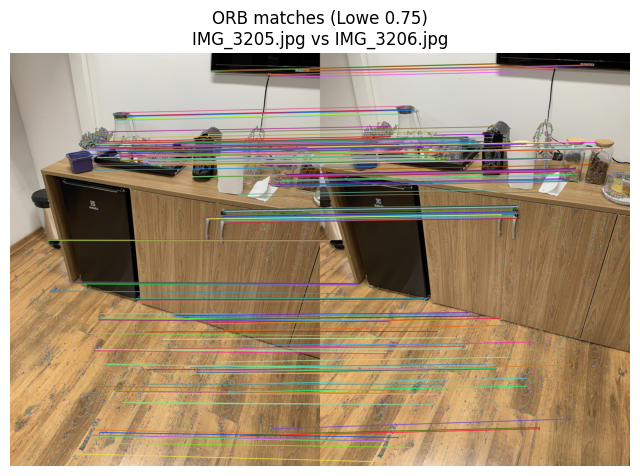

In [10]:
K = 2
lowe_threshold = 0.75
bf_matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf_matcher.match(dataset[0]['desc'], dataset[1]['desc'])
print(len(matches))
matches = sorted(matches, key=lambda x: x.distance)[:249]
img_matches = np.zeros((
    max(dataset[0]['image'].shape[0], dataset[1]['image'].shape[0]),
    dataset[0]['image'].shape[1] + dataset[1]['image'].shape[1],
    3
), dtype=np.uint8)

cv2.drawMatches(dataset[0]['image'], dataset[0]['kp'], dataset[1]['image'], dataset[1]['kp'], matches, img_matches, matchesThickness=5)
img_matches = cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB)
plt.imshow(img_matches)
plt.axis('off')
plt.title(f"ORB matches (Lowe {lowe_threshold})\n{image_names[0]} vs {image_names[1]}")
out_dir = os.path.join('..', 'report', 'figs', 'kp_matching', os.path.basename(os.path.normpath(image_folder)))
os.makedirs(out_dir, exist_ok=True)
out_name = f"{os.path.splitext(image_names[0])[0]}_{os.path.splitext(image_names[1])[0]}_matches_orb.png"
plt.savefig(os.path.join(out_dir, out_name), dpi=200, bbox_inches='tight')
print(f"Saved to {os.path.abspath(os.path.join(out_dir, out_name))}")

### SIFT Matching

In [ ]:
# usar SIFT por ser invariante à escala?
# TODO: escolher numero de features que facilite a visualizacao sem comprometer o resultado final
# TODO: explicar o funcionamento do ORB, do SIFT, do FLANN e da filtragem usando teste da razão de Lowe
sift = cv2.SIFT_create(nfeatures=50000)

In [18]:
dataset = []
for i, img in enumerate(images):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    keypoints, descriptors = sift.detectAndCompute(gray_img, None)
    dataset.append({'image': img, 'gray': gray_img, 'kp': keypoints, 'desc': descriptors})

In [19]:
K = 2
lowe_threshold = 0.25
flann_matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)

In [ ]:
def match_image_pair(d1, d2):
    knn_matches = flann_matcher.knnMatch(d1['desc'], d2['desc'], K)
    filtered = []
    for m, n in knn_matches:
        if m.distance < lowe_threshold * n.distance:
            filtered.append(m)
    return filtered

In [21]:
matches = match_image_pair(dataset[0], dataset[1])
print(len(matches))

249


In [13]:
img_matches = np.zeros((
    max(dataset[0]['image'].shape[0], dataset[1]['image'].shape[0]),
    dataset[0]['image'].shape[1] + dataset[1]['image'].shape[1],
    3
), dtype=np.uint8)

cv2.drawMatches(dataset[0]['image'], dataset[0]['kp'], dataset[1]['image'], dataset[1]['kp'], matches, img_matches, matchesThickness=5)
img_matches = cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB)

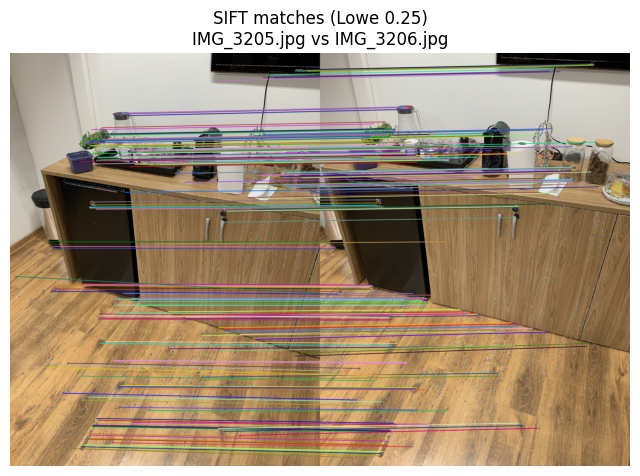

In [14]:
plt.imshow(img_matches)
plt.axis('off')
plt.title(f"SIFT matches (Lowe {lowe_threshold})\n{image_names[0]} vs {image_names[1]}")
out_dir = os.path.join('..', 'report', 'figs', 'kp_matching', os.path.basename(os.path.normpath(image_folder)))
os.makedirs(out_dir, exist_ok=True)
out_name = f"{os.path.splitext(image_names[0])[0]}_{os.path.splitext(image_names[1])[0]}_matches_sift.png"
plt.savefig(os.path.join(out_dir, out_name), dpi=200, bbox_inches='tight')
# plt.show()